<a href="https://colab.research.google.com/github/DanSM03/PracticaRedesNeuronales/blob/main/PracticaRedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Datos y configuraciones generales




In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from time import time
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

## Imagenes del dataset

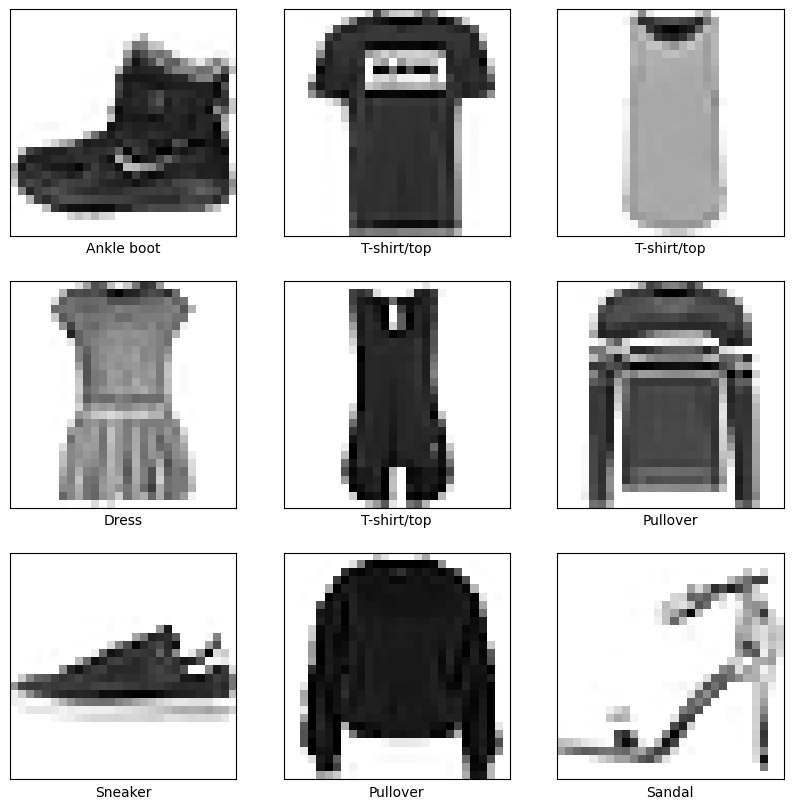

In [ ]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
(train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])

plot_images(train_images, train_labels, class_names)
plt.show()

In [ ]:
mse = tf.keras.losses.mean_squared_error(Y_testConv, ConvPredicts)
mse_average = tf.reduce_mean(mse)
print("Error Medio Cuadrático (MSE) promedio:", mse_average.numpy()*100 , '%')

Error Medio Cuadrático (MSE) promedio: 1.4341470785439014 %


In [ ]:
modelFully = Sequential([
    Dense(1024, input_dim=input_size),
    Activation('relu'),
    Dense(512),
    Activation('sigmoid'),
    Dense(256),
    Activation('relu'),
    Dense(128),
    Activation('sigmoid'),
    Dense(64),
    Activation('relu'),
    Dense(classes),
    Activation('softmax')
])

In [ ]:
modelFully.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

## División de los datos en los grupos de Entrenamiento y Prueba

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Inicialización de los parámetros globales

In [ ]:
input_size = 784
batch_size = 50
epochs = 200

# 2. Aquitectura de un modelo *Fully Connected*

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

classes = 10
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

### Compilado del modelo

In [ ]:
modelFully.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

### Entrenamiento del modelo

In [ ]:
historyFullyConnected = modelFully.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)

#### Exportación del modelo

In [ ]:
modelFully.save('FullyConnect.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 3. Arquitectura de un modelo *Convolutional*

In [ ]:
(X_trainConv, Y_trainConv), (X_testConv, Y_testConv) = fashion_mnist.load_data()

X_trainConv = X_train.reshape(60000, 28, 28, 1)
X_testConv = X_test.reshape(10000, 28, 28, 1)

classes = 10

In [ ]:
Y_trainConv = to_categorical(Y_trainConv, classes)
Y_testConv = to_categorical(Y_testConv, classes)

In [ ]:
modelConv = Sequential([

  Convolution2D(filters=28 ,kernel_size=(3, 3),input_shape=(28, 28, 1)),
  Activation('relu'),

  Convolution2D(filters=28, kernel_size=(3, 3)),
  Activation('sigmoid'),
  MaxPooling2D(pool_size=(2, 2)),

  Convolution2D(filters=28, kernel_size=(3, 3)),
  Activation('relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),

  Dense(128),
  Activation('relu'),
  Dense(64),
  Activation('sigmoid'),
  Dense(32),
  Activation('relu'),
  Dense(classes),
  Activation('softmax')
  ])

In [ ]:
modelConv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 28)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 28)        7084      
                                                                 
 activation_7 (Activation)   (None, 24, 24, 28)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 28)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 28)        7084      
                                                      

## Compilado del modelo

In [ ]:
modelConv.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

## Entrenamiento del modelo

In [ ]:
historyConvModel = modelConv.fit(X_trainConv, Y_trainConv, batch_size=batch_size, epochs=epochs, validation_data=(X_testConv,Y_testConv), verbose=1)

### Exportación del modelo

In [ ]:
modelConv.save('Convolutional1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 4. Evaluación del los modelos


##  Modelo Fully Connected


### Carga del modelo desde un archivo

In [ ]:
loadedFully = tf.keras.models.load_model('/content/FullyConnect.h5')
FullyPredicts = loadedFully.predict(X_test)

313/313 [==============================] - 1s 2ms/step


#### Accuracy

In [ ]:
score = loadedFully.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1]*100, '%')

313/313 [==============================] - 1s 3ms/step - loss: 0.4251 - accuracy: 0.8917
Test accuracy: 89.1700029373169 %


#### Error medio cuadrático

In [ ]:
mse = tf.keras.losses.mean_squared_error(Y_test, FullyPredicts)
mse_average = tf.reduce_mean(mse)
print("Error Medio Cuadrático (MSE) promedio:", mse_average.numpy()*100, '%')

Error Medio Cuadrático (MSE) promedio: 1.721779815852642 %


## Modelo Convolutional

### Carga del modelo desde un archivo

In [ ]:
loadedConv = tf.keras.models.load_model('/content/Convolutional.h5')
ConvPredicts = loadedConv.predict(X_testConv)

313/313 [==============================] - 1s 4ms/step


#### Accuracy

In [ ]:
score = loadedConv.evaluate(X_testConv, Y_testConv, verbose=1)
print('Test accuracy:', score[1]*100, '%')

313/313 [==============================] - 1s 4ms/step - loss: 0.4223 - accuracy: 0.9137
Test accuracy: 91.36999845504761 %


#### Error medio cuadrático

# 5. Graficas de comportamiento de los modelos

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='r', label='Validation')
    plt.legend()
    plt.title('Model Loss')


    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='r', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')

    plt.show()

## Modelo Fully Connected

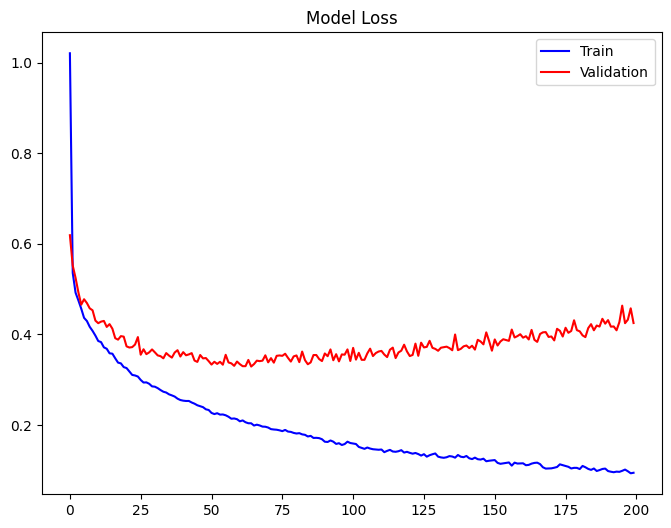

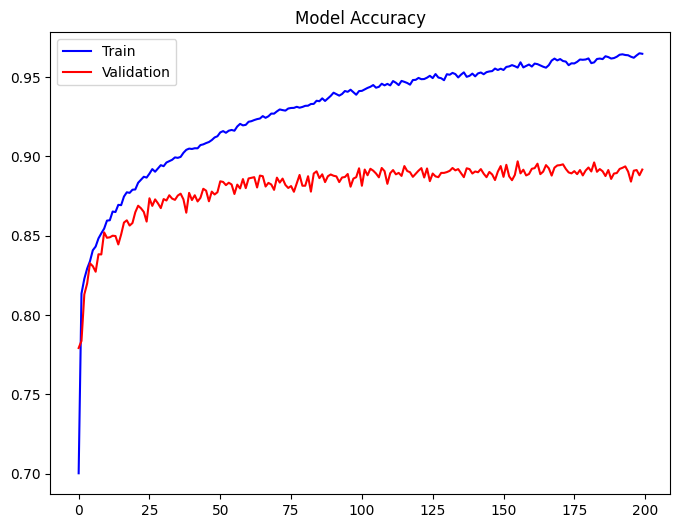

In [ ]:
plot_loss_acc(historyFullyConnected)

## Modelo Convolutional

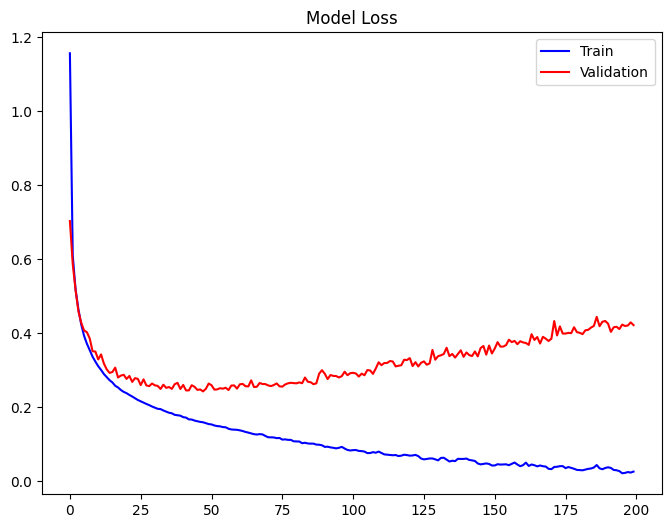

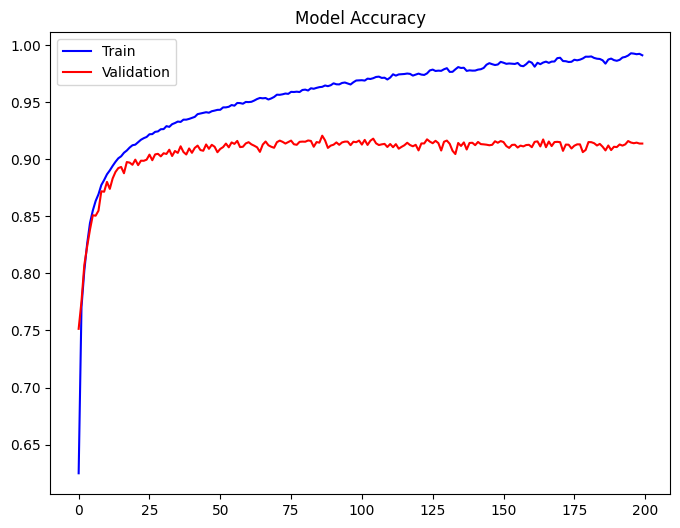

In [ ]:
plot_loss_acc(historyConvModel)